<a href="https://colab.research.google.com/github/chandu220/chandrika_22/blob/main/diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
dataset = pd.read_csv('/content/diabetes.csv')


In [ ]:
print(dataset.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [ ]:
print(dataset.shape)


(768, 9)


In [ ]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [ ]:
print(dataset.describe().T)

                          count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000  62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.00000   
Insulin                   768.0   79.799479  115.244002   0.000   0.00000   
BMI                       768.0   31.992578    7.884160   0.000  27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   33.240885   11.760232  21.000  24.00000   
Outcome                   768.0    0.348958    0.476951   0.000   0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinT

In [ ]:
print(dataset.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


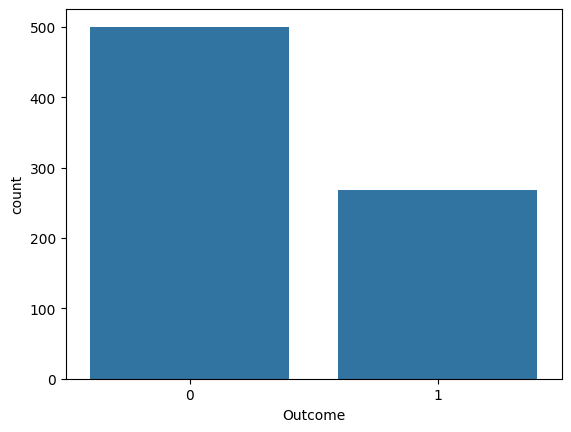

In [ ]:
sns.countplot(x='Outcome', data=dataset)

# Replace zero values with NaN in specific columns
dataset[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]] = \
    dataset[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]].replace(0, np.NaN)

# Replace NaN values with the mean of each column
dataset["Glucose"].fillna(dataset["Glucose"].mean(), inplace=True)
dataset["BloodPressure"].fillna(dataset["BloodPressure"].mean(), inplace=True)
dataset["SkinThickness"].fillna(dataset["SkinThickness"].mean(), inplace=True)
dataset["Insulin"].fillna(dataset["Insulin"].mean(), inplace=True)
dataset["BMI"].fillna(dataset["BMI"].mean(), inplace=True)

# Check for missing values after preprocessing
print(dataset.isnull().sum())

# Define features (X) and target variable (y)
X = dataset.drop('Outcome', axis=1)
y = dataset['Outcome']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train a logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
new_glucose = float(input('Enter Glucose level: '))
new_blood_pressure = float(input('Enter Blood Pressure: '))
new_skin_thickness = float(input('Enter Skin Thickness: '))
new_insulin = float(input('Enter Insulin level: '))
new_bmi = float(input('Enter BMI: '))
new_age = float(input('Enter Age: '))
new_pregnancies = float(input('Enter Pregnancies: '))
new_diabetes_pedigree_function = float(input('Enter Diabetes Pedigree Function: '))

# Create a new sample based on user input
new_sample = [[new_glucose, new_blood_pressure, new_skin_thickness, new_insulin, new_bmi,
               new_age, new_pregnancies, new_diabetes_pedigree_function]]

Enter Glucose level: 6
Enter Blood Pressure: 5
Enter Skin Thickness: 34
Enter Insulin level: 24
Enter BMI: 4556
Enter Age: 24
Enter Pregnancies: 2
Enter Diabetes Pedigree Function: 0


In [ ]:
prediction = model.predict(new_sample)
if prediction==1:
  print("diabetic")
else:
  print("non diabetic")


non diabetic


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
